# Pyart : Lectura de un archivo de radar

Comencemos con una introducción sobre lo que es Py-ART, luego comenzaremos programar.

El kit de herramientas de radar Python ARM o Py-ART:

  * Py-ART es un módulo de Python para trazar, corregir y analizar datos de radar meteorológico.
  * El desarrollo comenzó a abordar las necesidades de ARM con la adquisición de una serie de
    nueva nube de escaneo y radar de precipitación como parte de la Ley de Recuperación Estadounidense.
  * Desde entonces, el proyecto se ha expandido para trabajar con una variedad de radares meteorológicos y un usuario más amplio
    base incluyendo investigadores de radar y modeladores climáticos.
  * El software ha sido lanzado en GitHub como software de código abierto bajo una licencia BSD.
    Se ejecuta en Linux, OS X. También se ejecuta en Windows con una funcionalidad más limitada.
   
Las contribuciones de otros siempre son bienvenidas.

¿Qué puede hacer Py-ART?
Py-ART se puede utilizar para una variedad de tareas, desde el trazado básico hasta herramientas de procesamiento más complejas. Los usos específicos para Py-ART incluyen:

  * Lectura de datos de radar en una variedad de formatos de archivo.
  * Creación de parcelas y visualización de datos de radar.
  * Corrección de momentos de radar mientras se encuentra en coordenadas de antena, tales como:
     * Doppler desplegado / des-aliasing.
     * Corrección de atenuación.
     * Procesamiento de fase utilizando un método de programación lineal.
  * Asignación de datos de uno o varios radares en una cuadrícula cartesiana.
  * Realización de recuperaciones.
  * Escritura de datos radiales y cartesianos en archivos NetCDF.

Enlaces esenciales de Py-ART:
  * Página de inicio, (http://arm-doe.github.io/pyart/)
  * Documentación, (http://arm-doe.github.io/pyart-docs-travis/)
  * Ejemplos, (http://arm-doe.github.io/pyart/dev/auto_examples/index.html)
  * Código fuente, (https://github.com/ARM-DOE/pyart)
  * Lista de correo, (http://groups.google.com/group/pyart-users/)
  * Rastreador de problemas, (https://github.com/ARM-DOE/pyart/issues)

Now that we know what Py-ART is, let us began coding.

First we want to import any modules that will be needed.

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge cartopy

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pyart
import os
import warnings
warnings.filterwarnings('ignore')

To read a radar file:

Para ver la lista completa de parámetros, en un Jupyter Notebook, simplemente agregue un signo de interrogación después de la función.

In [6]:
pyart.io.read?

In [7]:
# radar = pyart.io.read('data/TAB191023201003.RAWD9FW')
radar = pyart.io.read('data/CHI210723120005.RAWHAFE')

Al leer un archivo de radar, hay algunas opciones para agregar, como excluir los campos de radar. Excluir campos se vuelve útil cuando está cargando muchos archivos de radar a la vez y desea conservar memoria y ahorrar tiempo.

En el objeto radar hay campos. Aquí es donde se almacenan datos como la reflectividad y la velocidad.
Para ver qué campos están presentes, podemos agregar las adiciones de campos y claves a la variable donde
Se almacena el objeto de radar.

In [8]:
radar.fields.keys()

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'differential_phase', 'normalized_coherent_power', 'cross_correlation_ratio', 'radar_echo_classification'])

Los campos se almacenan en un diccionario, cada uno con coordenadas, unidades y más.
Se puede acceder a todos simplemente agregando los campos adicionales a la variable del objeto de radar.
Para un campo individual, agregamos una cadena entre paréntesis después de la adición de campos para ver
el contenido de ese campo

In [9]:
print(radar.fields)

{'total_power': {'units': 'dBZ', 'standard_name': 'equivalent_reflectivity_factor', 'long_name': 'Total power', 'coordinates': 'elevation azimuth range', 'data': masked_array(
  data=[[53.0, 16.5, 60.5, ..., --, --, --],
        [50.5, 50.0, 61.0, ..., --, --, --],
        [52.0, 34.5, 55.0, ..., --, --, --],
        ...,
        [51.0, 9.0, 32.0, ..., --, --, --],
        [52.5, 9.0, 30.5, ..., --, --, --],
        [51.5, 8.5, 52.0, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32), '_FillValue': -9999.0}, 'reflectivity': {'units': 'dBZ', 'standard_name': 'equivalent_reflectivity_factor', 'long_name': 'Reflectivity', 'coordinates

In [10]:
print(radar.fields['reflectivity'])

{'units': 'dBZ', 'standard_name': 'equivalent_reflectivity_factor', 'long_name': 'Reflectivity', 'coordinates': 'elevation azimuth range', 'data': masked_array(
  data=[[27.5, -12.0, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [27.0, -2.0, --, ..., --, --, --],
        ...,
        [24.0, 0.5, 6.0, ..., --, --, --],
        [26.5, -7.5, 4.0, ..., --, --, --],
        [30.0, -8.0, --, ..., --, --, --]],
  mask=[[False, False,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32), '_FillValue': -9999.0}


We can go even further in the dictionary and a see within the reflectivity field by accessing the units or data itself.
For example add the string data in brackets after the reflectivity string bracket.

In [11]:
print(radar.fields['reflectivity']['data'])

[[27.5 -12.0 -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [27.0 -2.0 -- ... -- -- --]
 ...
 [24.0 0.5 6.0 ... -- -- --]
 [26.5 -7.5 4.0 ... -- -- --]
 [30.0 -8.0 -- ... -- -- --]]


Finally, for a more condensed view of the radar object, just use radar.info().

In [12]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (180,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (180,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	total_power:
		data: <ndarray of type: float32 and shape: (180, 93)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Total power
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	reflectivity:
		data: <ndarray of type: float32 and shape: (180, 93)>
		units: dBZ
		standa

Ahora que hemos cargado los datos y los hemos inspeccionado, ¡el siguiente paso lógico es visualizar los datos! La funcionalidad de visualización de Py-ART se realiza a través de los objetos en el módulo pyart.graph:

http://arm-doe.github.io/pyart-docs-travis/user_reference/graph.html

En Py-ART hay 5 clases de visualización en pyart.graph:

* RadarDisplay
* RadarMapDisplay
* AirborneRadarDisplay

Trazar datos de cuadrícula
* GridMapDisplay

Para los ejemplos en este tutorial, usaremos RadarMapDisplay. Para este ejemplo, vamos a usar Cartopy para trazar nuestros datos.

Para mostrar una imagen de radar usando Cartopy, primero creamos una figura y luego creamos un objeto RadarMapDisplayCartopy desde el radar. El siguiente ejemplo muestra la reflectividad del radar.

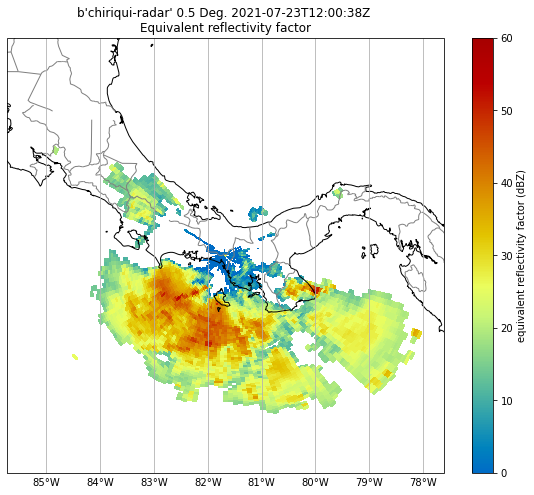

In [13]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw = {'projection':ccrs.PlateCarree()})

display.plot_ppi_map('reflectivity', sweep=0, resolution='10m',
                     vmin=0, vmax=60,
                     projection=ccrs.PlateCarree(), fig=fig,
                     lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0])
plt.show()

Puede cambiar muchos parámetros en el gráfico cambiando los argumentos a plot_ppi_map. Como puedes recordar de antes. simplemente vea estos argumentos en un cuaderno de Jupyter escribiendo:

In [14]:
display.plot_ppi_map?

For example, let's change the colormap to something different

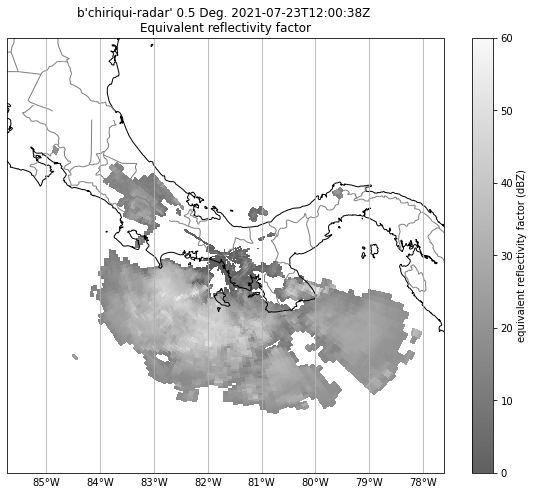

In [15]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw = {'projection':ccrs.PlateCarree()})

display.plot_ppi_map('reflectivity', sweep=0, resolution='10m',
                     vmin=0, vmax=60,
                     projection=ccrs.PlateCarree(), fig=fig,
                     lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0],
                      cmap='pyart_Gray9')
plt.show()

¡veamos un escaneo de elevación diferente! Para hacer esto, cambie el parámetro de barrido en la función plot_ppi_map.

In [16]:
radar = pyart.io.read('data/CHI210723120051.RAWHAFJ')

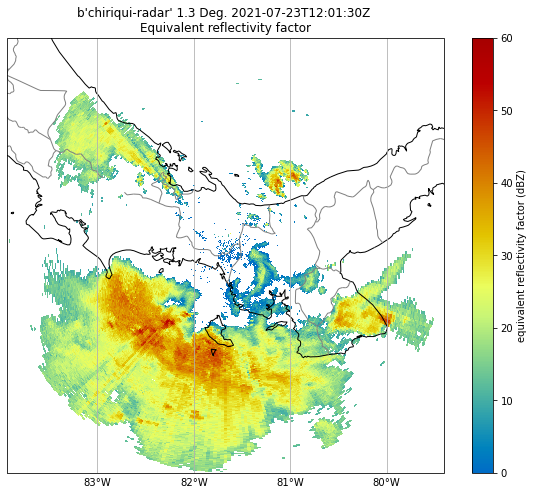

In [17]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw = {'projection':ccrs.PlateCarree()})

display.plot_ppi_map('reflectivity', sweep=1, resolution='10m',
                     vmin=0, vmax=60,
                     projection=ccrs.PlateCarree(), fig=fig,
                     lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0])
plt.show()

#  Es Su turno
Utilizando una sentencia for, generar un gráfico de cada una de las elevaciones del radar

O muestre la velocidad radial en lugar de la reflectividad.

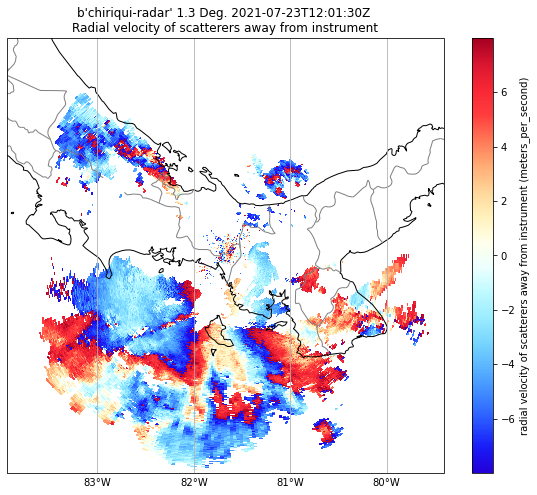

In [18]:
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]

projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw = {'projection':ccrs.PlateCarree()})

display.plot_ppi_map('velocity', sweep=1, resolution='10m',
                     vmin=-nyq, vmax=nyq,
                     projection=ccrs.PlateCarree(), fig=fig,
                     lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0])
plt.show()

## Ejercicio

Ahora que se han introducido los conceptos básicos de carga y procesamiento de archivos Cf / Radial, sigamos usando lo que hemos aprendido para cargar y grafiquemos un archivo del radar de Guaviare (GUA) ubicado en el directorio de datos. Se recomienda usar radar.fields.keys () para verificar el nombre de los campos para el trazado. Juegue con factores cambiantes como el área, la escala de colores, los mapas de colores, los límites de los ejes para tener una idea de cómo visualizar los datos de radar con Py-ART.

Press shift-Enter in the below cell for a possible answer. There are many ways to visualize data using Py-ART, so the answer here is not necessarily the only one!

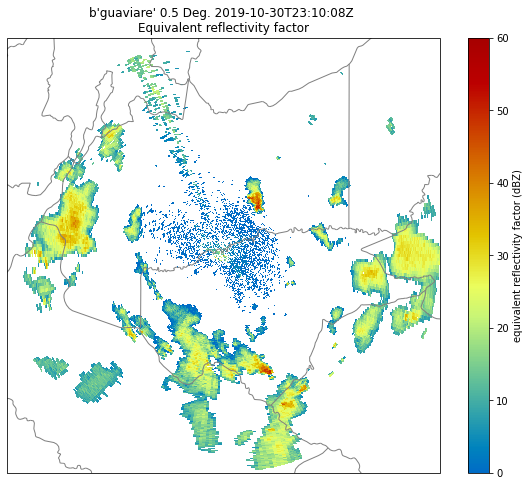

In [19]:
# %load section_1_answer.py
radar = pyart.io.read('./data/GUA191030231003.RAWCH8U')
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw = {'projection':ccrs.PlateCarree()})

display.plot_ppi_map('reflectivity', sweep=0, resolution='10m',
                     vmin=0, vmax=60,
                     projection=ccrs.PlateCarree(), fig=fig,
                     lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0])
plt.show()
